In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [27]:
num_points = 1000
radius = 1
x = torch.rand(num_points,2)*2-1
y = ((x[:,0]**2+x[:,1]**2)<radius**2).float()
# x[:,0].shape
# data = {
#     'x':x[:,0],
#     'y':x[:,1],
#     'in':y
# }
# data = pd.DataFrame(data)
# data


In [28]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class Model(nn.Module):
    def __init__(self, ):
        super(Model,self).__init__()
        self.hl1 = nn.Linear(2,40)
        self.hl2 = nn.Linear(40,20)
        self.hl3 = nn.Linear(20,1)
    
    def forward(self,x):
        x = self.hl1(x)
        x = nn.ReLU()(x)
        x = self.hl2(x)
        x = nn.Tanh()(x)     
        x = self.hl3(x)
        x = nn.Sigmoid()(x)
        return x
        
        

In [42]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.Tanh(),
            nn.Linear(20, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Example usage:
model = Model()
print(model,model.state_dict())

Model(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=1, bias=True)
    (5): Sigmoid()
  )
) OrderedDict([('model.0.weight', tensor([[-0.0117, -0.2019],
        [-0.2739, -0.3256],
        [ 0.0456,  0.3604],
        [-0.5829, -0.1102],
        [-0.3585, -0.3397],
        [ 0.4283, -0.1670],
        [ 0.0063, -0.5704],
        [-0.6702,  0.6160],
        [-0.5361, -0.2275],
        [ 0.6138, -0.6071],
        [ 0.7043,  0.5145],
        [-0.5903, -0.5284],
        [-0.0399,  0.1401],
        [ 0.1451, -0.1874],
        [-0.1968,  0.5368],
        [-0.3038, -0.0634],
        [ 0.6657,  0.4682],
        [ 0.3156,  0.3379],
        [-0.5505,  0.0109],
        [ 0.5093,  0.5831],
        [-0.3125, -0.1774],
        [ 0.5543,  0.4880],
        [-0.3156, -0.0874],
        [ 0.0252, -0.2380],
        [-0.5889,  0.0413],
   

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [38]:
model = Model().to(device=device)
optimiser = torch.optim.Adam(model.parameters(),lr = 0.01)
loss_fn = nn.BCELoss()

model

Model(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [39]:
# model = nn.Sequential(nn.Linear(2,20),nn.Linear(20,1),nn.Sigmoid())

# model.to(device)


In [40]:
def train(epoch):
    model.train()
    
    for batch_idx,(data,target) in enumerate(train_loader):
        # Move data to the same device as model
        data,target = data.to(device),target.to(device)
        target = target.view(-1, 1)
        optimiser.zero_grad()
        
        output = model(data)
        loss = loss_fn(output,target)
        
        loss.backward()
        optimiser.step()
        
        n = len(train_loader.dataset)
        if batch_idx%20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{n} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


def test():
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data,target in test_loader:
            # Move data to the same device as model
            data,target = data.to(device),target.to(device)
            target = target.view(-1, 1)
            output = model(data)
            test_loss +=loss_fn(output,target).item()
            pred = (output > 0.5).float()
            correct +=pred.eq(target.view_as(pred)).sum().item()
            
        n = len(test_loader.dataset)
        test_loss/=n
        print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{n} '
              f'({100. * correct / n:.0f}%)\n')

In [41]:
for epoch in range(1,100):
    train(epoch)
    test()

Train Epoch: 1 [0/800 (0%)]	Loss: 0.621369
Train Epoch: 1 [640/800 (80%)]	Loss: 0.504912

Test set: Average loss: 0.0167, Accuracy: 154/200 (77%)

Train Epoch: 2 [0/800 (0%)]	Loss: 0.495411
Train Epoch: 2 [640/800 (80%)]	Loss: 0.442151

Test set: Average loss: 0.0120, Accuracy: 172/200 (86%)

Train Epoch: 3 [0/800 (0%)]	Loss: 0.305449
Train Epoch: 3 [640/800 (80%)]	Loss: 0.141185

Test set: Average loss: 0.0068, Accuracy: 186/200 (93%)

Train Epoch: 4 [0/800 (0%)]	Loss: 0.312174
Train Epoch: 4 [640/800 (80%)]	Loss: 0.074720

Test set: Average loss: 0.0045, Accuracy: 191/200 (96%)

Train Epoch: 5 [0/800 (0%)]	Loss: 0.129736
Train Epoch: 5 [640/800 (80%)]	Loss: 0.176521

Test set: Average loss: 0.0044, Accuracy: 191/200 (96%)

Train Epoch: 6 [0/800 (0%)]	Loss: 0.086370
Train Epoch: 6 [640/800 (80%)]	Loss: 0.239181

Test set: Average loss: 0.0043, Accuracy: 189/200 (94%)

Train Epoch: 7 [0/800 (0%)]	Loss: 0.072357
Train Epoch: 7 [640/800 (80%)]	Loss: 0.091625

Test set: Average loss: 0.00

/tmp/ipykernel_36406/3528963197.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap="coolwarm", marker='x', label="Test Data")


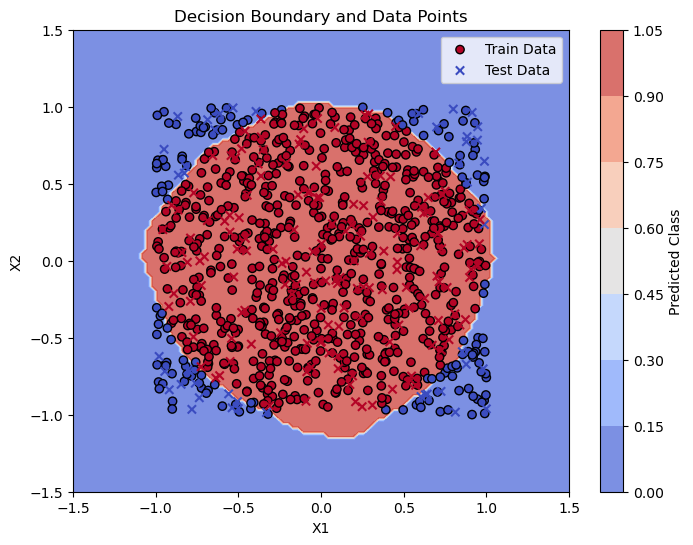

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Create a 2D grid of points covering the input space
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert to a torch tensor and move to the correct device
grid_points = torch.tensor(grid_points, dtype=torch.float32).to(device)

# Get model predictions for the grid points
model.eval()  # Switch to evaluation mode
with torch.no_grad():
    outputs = model(grid_points)
    predictions = (outputs > 0.5).float()  # Threshold at 0.5 to classify as 0 or 1

# Reshape the predictions back to the grid shape
predictions = predictions.cpu().numpy().reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.75, cmap="coolwarm")
plt.colorbar(label='Predicted Class')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap="coolwarm", marker='o', label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap="coolwarm", marker='x', label="Test Data")

# Label the plot
plt.title("Decision Boundary and Data Points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
